In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Retail_Data_Transactions.csv")
df.head()


,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


Index(['customer_id', 'trans_date', 'tran_amount'], dtype='object')

In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Convert amount to numeric
df['tran_amount'] = df['tran_amount'].astype(float)

# Convert date column to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

df.info()


C:\Users\bhava\AppData\Local\Temp\ipykernel_8448\2007580235.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])


<class 'pandas.core.frame.DataFrame'>
Index: 124994 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  124994 non-null  object        
 1   trans_date   124994 non-null  datetime64[ns]
 2   tran_amount  124994 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.8+ MB


In [5]:
df['Year'] = df['trans_date'].dt.year
df['Month'] = df['trans_date'].dt.month

df.head()


,customer_id,trans_date,tran_amount,Year,Month
0,CS5295,2013-02-11,35.0,2013,2
1,CS4768,2015-03-15,39.0,2015,3
2,CS2122,2013-02-26,52.0,2013,2
3,CS1217,2011-11-16,99.0,2011,11
4,CS1850,2013-11-20,78.0,2013,11


In [6]:
# Total sales
total_sales = df['tran_amount'].sum()
total_sales


np.float64(8123673.0)

In [7]:
# Sales by year
sales_by_year = df.groupby('Year')['tran_amount'].sum()
sales_by_year


Year
2011    1340291.0
2012    2116532.0
2013    2137352.0
2014    2094363.0
2015     435135.0
Name: tran_amount, dtype: float64

In [8]:
# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month'])['tran_amount'].sum()
monthly_sales


Year  Month
2011  5         98951.0
      6        174527.0
      7        178097.0
      8        188631.0
      9        169173.0
      10       182586.0
      11       166921.0
      12       181405.0
2012  1        177987.0
      2        170135.0
      3        180453.0
      4        168000.0
      5        178880.0
      6        172933.0
      7        179117.0
      8        179284.0
      9        174978.0
      10       181862.0
      11       179156.0
      12       173747.0
2013  1        181729.0
      2        160359.0
      3        181491.0
      4        173642.0
      5        185826.0
      6        176813.0
      7        180967.0
      8        180031.0
      9        176830.0
      10       181521.0
      11       177341.0
      12       180802.0
2014  1        184554.0
      2        154151.0
      3        179729.0
      4        174149.0
      5        169555.0
      6        172741.0
      7        179026.0
      8        178975.0
      9        173385.0
    

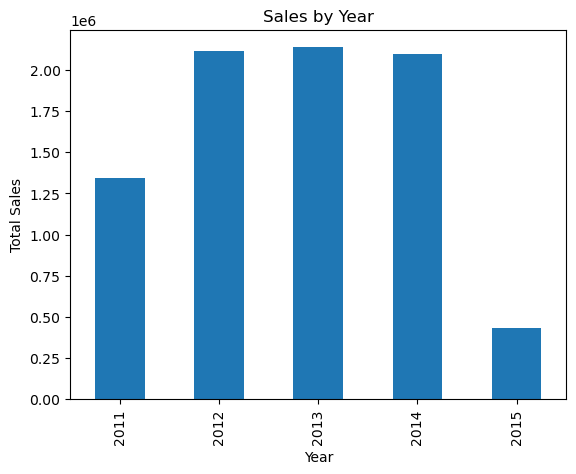

In [9]:
sales_by_year.plot(kind='bar', title='Sales by Year')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


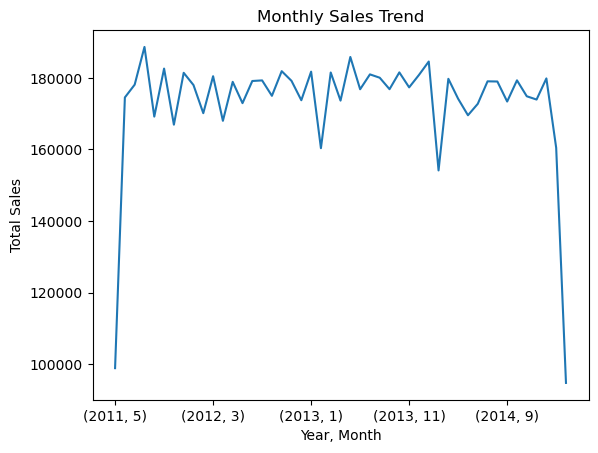

In [10]:
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel("Year, Month")
plt.ylabel("Total Sales")
plt.show()


In [11]:
with pd.ExcelWriter("sales_report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Cleaned_Data", index=False)
    sales_by_year.to_excel(writer, sheet_name="Sales_by_Year")
    monthly_sales.to_excel(writer, sheet_name="Monthly_Sales")


In [12]:
sales_report.xlsx


NameError: name 'sales_report' is not defined

In [14]:
import sqlite3


In [15]:
# Create SQLite database in memory
conn = sqlite3.connect("sales_data.db")

# Store dataframe as SQL table
df.to_sql("sales", conn, if_exists="replace", index=False)

print("Data successfully loaded into SQL database")


Data successfully loaded into SQL database


In [16]:
query_total_sales = """
SELECT SUM(tran_amount) AS total_sales
FROM sales;
"""

sql_total_sales = pd.read_sql(query_total_sales, conn)
sql_total_sales


,total_sales
0,8123673.0


In [17]:
query_yearly_sales = """
SELECT Year, SUM(tran_amount) AS yearly_sales
FROM sales
GROUP BY Year
ORDER BY Year;
"""

sql_sales_by_year = pd.read_sql(query_yearly_sales, conn)
sql_sales_by_year


,Year,yearly_sales
0,2011,1340291.0
1,2012,2116532.0
2,2013,2137352.0
3,2014,2094363.0
4,2015,435135.0


In [18]:
query_monthly_sales = """
SELECT Year, Month, SUM(tran_amount) AS monthly_sales
FROM sales
GROUP BY Year, Month
ORDER BY Year, Month;
"""

sql_monthly_sales = pd.read_sql(query_monthly_sales, conn)
sql_monthly_sales


,Year,Month,monthly_sales
0,2011,5,98951.0
1,2011,6,174527.0
2,2011,7,178097.0
3,2011,8,188631.0
4,2011,9,169173.0
5,2011,10,182586.0
6,2011,11,166921.0
7,2011,12,181405.0
8,2012,1,177987.0
9,2012,2,170135.0


In [19]:
conn.close()


In [20]:
with pd.ExcelWriter("sales_report.xlsx", mode="a", engine="openpyxl") as writer:
    sql_sales_by_year.to_excel(writer, sheet_name="SQL_Sales_by_Year", index=False)
